   Array Size  Pure Python Time (s)  NumPy Time (s)
0       1D-10              0.000008        0.000058
1       1D-50              0.000010        0.000004
2      1D-100              0.000012        0.000002
3      1D-200              0.000020        0.000003
4      1D-500              0.000067        0.000005
5    2D-10x10              0.000242        0.000032
6    2D-50x50              0.023719        0.000237
7  2D-100x100              0.095675        0.001000
8  2D-200x200              0.982935        0.008378
9  2D-500x500             20.141618        0.280337


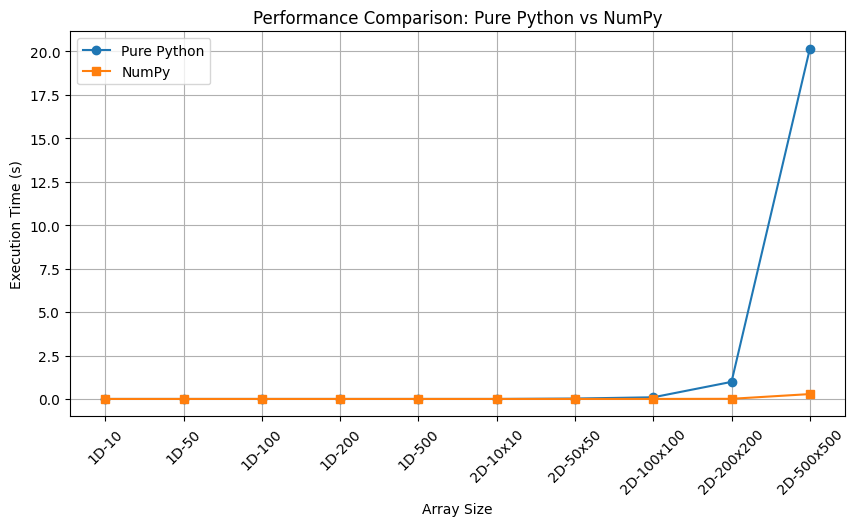

In [ ]:
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt

# Pure Python
def multiply_1d_python(a, b):
    return [a[i] * b[i] for i in range(len(a))]

def multiply_2d_python(A, B):
    result = [[sum(A[i][k] * B[k][j] for k in range(len(B))) for j in range(len(B[0]))] for i in range(len(A))]
    return result

#NumPy
def benchmark():
    sizes_1d = [10, 50, 100, 200, 500]
    sizes_2d = [10, 50, 100, 200, 500]
    results = []

    for size in sizes_1d:
        a = list(range(size))
        b = list(range(size))
        np_a = np.array(a)
        np_b = np.array(b)

        start = time.time()
        multiply_1d_python(a, b)
        python_time = time.time() - start

        start = time.time()
        np_result = np_a * np_b
        numpy_time = time.time() - start

        results.append([f"1D-{size}", python_time, numpy_time])

    for size in sizes_2d:
        A = [[i + j for j in range(size)] for i in range(size)]
        B = [[i * j if j > 0 else 1 for j in range(size)] for i in range(size)]
        np_A = np.array(A)
        np_B = np.array(B)

        start = time.time()
        multiply_2d_python(A, B)
        python_time = time.time() - start

        start = time.time()
        np_result = np.matmul(np_A, np_B)
        numpy_time = time.time() - start

        results.append([f"2D-{size}x{size}", python_time, numpy_time])

    df = pd.DataFrame(results, columns=["Array Size", "Pure Python Time (s)", "NumPy Time (s)"])
    return df

# Run the benchmark and display results
df_results = benchmark()

# Display results as a table
print(df_results)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(df_results["Array Size"], df_results["Pure Python Time (s)"], label="Pure Python", marker='o')
plt.plot(df_results["Array Size"], df_results["NumPy Time (s)"], label="NumPy", marker='s')
plt.xticks(rotation=45)
plt.ylabel("Execution Time (s)")
plt.xlabel("Array Size")
plt.title("Performance Comparison: Pure Python vs NumPy")
plt.legend()
plt.grid()
plt.show()